In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from src.func import *


from sklearn.pipeline import make_pipeline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.metrics import mean_squared_error



In [2]:
diamantes_test =  pd.read_csv('predict.csv')

In [3]:
diamantes_train =  pd.read_csv('train.csv')

In [4]:
diamantes_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.33,Very Good,I,IF,62.0,58.0,4.44,4.46,2.76
1,1,1.21,Very Good,D,SI2,62.4,58.0,6.77,6.83,4.24
2,2,1.06,Very Good,D,SI1,59.3,60.0,6.64,6.71,3.96
3,3,0.36,Ideal,E,VVS1,61.4,57.0,4.64,4.61,2.54
4,4,0.70,Ideal,E,VS1,62.3,54.0,5.67,5.72,3.55


In [5]:
diamantes_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [6]:
diamantes_train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [7]:
diamantes_train.shape

(40455, 11)

In [8]:
diamantes_train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798121,61.745132,57.451892,5.731217,5.735248,3.538685,3938.101125
std,11678.496907,0.474880,1.434259,2.225893,1.123364,1.152859,0.710579,3992.645108
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000,2401.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5333.000000
max,40454.000000,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18818.000000


In [9]:
diamantes_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [10]:
diamantes_train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
print(f"Column cut: {diamantes_train['cut'].unique()}\nColumn clarity: {diamantes_train['clarity'].unique()}\nColumn color: {diamantes_train['color'].unique()}")

Column cut: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Column clarity: ['SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2' 'IF' 'I1']
Column color: ['H' 'E' 'D' 'F' 'I' 'G' 'J']


In [12]:
diamantes_train.cut.value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

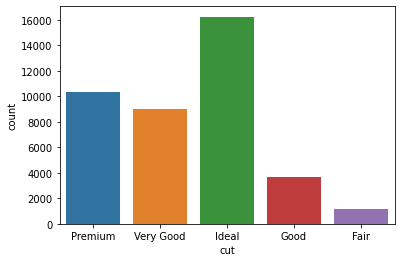

In [13]:
sns.countplot(x="cut", data=diamantes_train)
diamantes_train.loc[:,'cut'].value_counts()

In [14]:
corr_ma = diamantes_train.corr()
corr_ma[corr_ma>0.8]

,id,carat,depth,table,x,y,z,price
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carat,NaN,1.000000,NaN,NaN,0.974698,0.944318,0.947809,0.920994
depth,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
x,NaN,0.974698,NaN,NaN,1.000000,0.967194,0.965231,0.884080
y,NaN,0.944318,NaN,NaN,0.967194,1.000000,0.940881,0.858680
z,NaN,0.947809,NaN,NaN,0.965231,0.940881,1.000000,0.856299
price,NaN,0.920994,NaN,NaN,0.884080,0.858680,0.856299,1.000000


In [37]:
#Pasamos a numeros

diamantes_train = numerador(diamantes_train)
display(diamantes_train.head())

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,3,4,2,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,4,1,3,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,4,0,3,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,2,1,4,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,4,2,3,60.0,62.0,4.51,4.55,2.72,447


In [16]:
diamantes_train.dtypes

id           int64
carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [17]:
#diamantes_train = diamantes_train.drop(["x","y","z"],axis =1)
#Nos da la diferncia de la columna

X_diamantes = diamantes_train[diamantes_train.columns.difference(["price"])]
y_diamantes = diamantes_train["price"]
display(X_diamantes.head(),y_diamantes.head(),X_diamantes.shape)


,carat,clarity,color,cut,depth,id,table,x,y,z
0,1.12,2,4,3,61.6,0,59.0,6.67,6.63,4.10
1,1.14,3,1,4,60.0,1,54.0,6.74,6.97,4.11
2,0.90,3,0,4,60.3,2,63.0,6.12,6.22,3.72
3,0.71,4,1,2,61.9,3,54.0,5.74,5.76,3.56
4,0.34,3,2,4,60.0,4,62.0,4.51,4.55,2.72


0    5363
1    5593
2    3534
3    3212
4     447
Name: price, dtype: int64

(40455, 10)

In [36]:
from sklearn.preprocessing import StandardScaler,Normalizer
#estandarizar datos y normalizarlos (diferente a cero es reescalado)
normalizador(diamantes_train)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,-0.612046,0.239524,0.154183,0.292276,-0.375353,-0.035758,0.245774,0.295314,0.274262,0.279147,0.126114
1,-0.475243,0.197552,0.387384,-0.257328,-0.132513,-0.333882,-0.425545,0.246416,0.293898,0.220625,0.113737
2,-0.444200,0.055027,0.362098,-0.391424,-0.123863,-0.258438,0.639319,0.088769,0.107850,0.065448,-0.025960
3,-0.670843,-0.071884,-0.208837,-0.363276,0.037331,0.041829,-0.600750,0.003029,0.008317,0.011620,-0.070449
4,-0.429387,-0.239214,0.350057,-0.086659,-0.119744,-0.301710,0.506660,-0.269564,-0.254931,-0.285690,-0.216816
...,...,...,...,...,...,...,...,...,...,...,...
40450,0.513093,0.063568,-0.448754,-0.452176,-0.314730,0.424516,0.072962,0.105185,0.091177,0.150664,0.013499
40451,0.461649,-0.251561,-0.143714,-0.406819,0.334539,0.047372,-0.413413,-0.277939,-0.269447,-0.265872,-0.178412
40452,0.480474,0.059521,-0.420184,0.066254,-0.133978,-0.647074,-0.305608,0.150352,0.157568,0.070793,-0.046494
40453,0.490765,0.245775,-0.429163,0.234371,-0.300989,0.366468,-0.184834,0.226717,0.232216,0.275685,0.138744


### Pasamos el filtro al dataset

In [19]:
diamantes_testeo = numerador(diamantes_test)
diamantes = normalizador(X_diamantes)
display(diamantes.shape)
display(diamantes)


(40455, 10)

,carat,clarity,color,cut,depth,id,table,x,y,z
0,0.241452,-0.378374,0.294628,0.155424,-0.036046,-0.616972,0.247752,0.297691,0.276470,0.281394
1,0.198842,-0.133378,-0.259009,0.389914,-0.336063,-0.478347,-0.428324,0.248026,0.295817,0.222066
2,0.055046,-0.123905,-0.391556,0.362220,-0.258525,-0.444350,0.639535,0.088799,0.107887,0.065470
3,-0.072063,0.037424,-0.364180,-0.209357,0.041933,-0.672514,-0.602246,0.003036,0.008338,0.011649
4,-0.245043,-0.122662,-0.088771,0.358587,-0.309062,-0.439849,0.519005,-0.276133,-0.261143,-0.292651
...,...,...,...,...,...,...,...,...,...,...
40450,0.063574,-0.314758,-0.452217,-0.448795,0.424554,0.513140,0.072969,0.105194,0.091186,0.150678
40451,-0.255663,0.339994,-0.413453,-0.146057,0.048144,0.469176,-0.420154,-0.282471,-0.273841,-0.270207
40452,0.059586,-0.134123,0.066326,-0.420639,-0.647774,0.480994,-0.305939,0.150515,0.157739,0.070869
40453,0.248175,-0.303929,0.236660,-0.433354,0.370047,0.495558,-0.186639,0.228932,0.234484,0.278378


## Entrenamos con RandomForestRegressor

In [20]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
regr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=7, oob_score=False,
                      random_state=150, verbose=0, warm_start=False)
ramdomregr= regr.fit(X_train, y_train)
y_predRandomregr = ramdomregr.predict(X_test)
print(mean_squared_error(y_test, y_predRandomregr, squared=False))

728.0739104711715


In [21]:
randomOpti = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features="sqrt", max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=370, n_jobs=None, oob_score=False,
                      random_state=230, verbose=0, warm_start=False)



In [22]:


ramdomOptimiza= randomOpti.fit(X_train, y_train)
y_predRandomOptim = ramdomOptimiza.predict(X_test)
print(mean_squared_error(y_test, y_predRandomOptim, squared=False))



806.9646533638931


In [23]:
y_predRFR= ramdomOptimiza.predict(diamantes_testeo)
display(y_predRFR.shape,diamantes_testeo.shape)
#Lo aplicamos para hacer la predicción

compareRFR = pd.DataFrame({"id":list(range(0,len(y_predRFR))),'price':y_predRFR})
display(compareRFR)


(13485,)

(13485, 10)

,id,price
0,0,5322.137838
1,1,12663.386486
2,2,12663.386486
3,3,11685.151351
4,4,11665.275676
...,...,...
13480,13480,12663.386486
13481,13481,11599.716216
13482,13482,12689.132432
13483,13483,11691.235135


In [35]:
compareRFR.to_csv('./Outputs/sample_submissionRandomREgresion.csv',index=False)

### Probamos con GradientBoostinRegresor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
gradient = ensemble.GradientBoostingRegressor( n_estimators = 150,max_depth = 6,
                                             min_samples_split = 3,learning_rate = 0.1)
diamantesGBR = gradient.fit(X_train, y_train)
y_predGradienet = gradient.predict(X_test)
print(mean_squared_error(y_test, y_predGradienet, squared=False))

700.4173343468478


In [25]:
y_predGBR= diamantesGBR.predict(diamantes_testeo)
compareGBR = pd.DataFrame({"id":range(len(y_predGBR)),"price":y_predGBR})
display(compareGBR)

,id,price
0,0,161.790322
1,1,13257.226610
2,2,13257.226610
3,3,12429.696075
4,4,11901.709272
...,...,...
13480,13480,13257.226610
13481,13481,12555.525492
13482,13482,13257.226610
13483,13483,12048.614983


In [34]:
compareGBR.to_csv('./Outputs/sample_submissionGradientBoostingRegressor.csv',index=False)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  

gradient = ensemble.GradientBoostingRegressor( loss= "huber",n_estimators = 50,max_depth = 8,
                                             min_samples_split = 3,learning_rate = 0.1)
diamantesRFR = gradient.fit(X_train, y_train)
y_pred = diamantesRFR.predict(X_test)

print(mean_squared_error(y_test, y_pred,squared=False))


697.1345401437849


In [27]:
params = { 
           'learning_rate':[0.15,0.1,0.05], 
           'n_estimators':[50,2750],                    
          "random_state": [3,10,100]          
         }
tuning = GridSearchCV(estimator=gradient,param_grid=params,scoring="r2",verbose = 10, n_jobs=7, cv=5)

resultado = optimizar_modelos(tuning,diamantes,y_diamantes)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   23.8s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:   48.4s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed: 22.3min
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed: 44.7min
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 45.3min
[Parallel(n_jobs=7)]: Done  47 tasks      | elapsed: 66.5min
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed: 89.4min
[Parallel(n_jobs=7)]: Done  71 tasks      | elapsed: 90.7min
[Parallel(n_jobs=7)]: Done  87 out of  90 | elapsed: 134.6min remaining:  4.6min
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed: 146.4min finished


0.9664625470158187
Hecho en 9608.398s
Mejor  estimator encontado en la busqueda es:
GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=8,
                          min_samples_split=3, n_estimators=2750,
                          random_state=10)


In [28]:


X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)
GradientOptimizado = ensemble.GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=8, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=2750,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
GradientOptimizado = GradientOptimizado.fit(X_train, y_train)
y_predGradienetOptimizado = GradientOptimizado.predict(X_test)

print(mean_squared_error(y_test, y_predGradienetOptimizado,squared=False))



702.4216371302819


In [32]:
y_predGRedhop = GradientOptimizado.predict(diamantes_testeo)
compareGrandEstimacion2 = pd.DataFrame({"id":range(len(y_predGRedhop)),"price":y_predGRedhop })

compareGrandEstimacion2.to_csv('./Outputs/sample_submissionGradientBoostingRegressorOPt.csv',index=False)